In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

sys.path.append(parent_dir)

from simtrain import SETTINGS_POLIMI as SETTINGS
from simtrain.sim_models_new import Toy_intensity_Generator
import torch


In [2]:

state_size = SETTINGS.STATE_SIZE
experiment_name = "toy"
#num_negatives = 100
#conditioned=True
#kl_weight=.01

In [3]:
# parameter dicts
width= 8
user_state_dict = {"model_hyp": {"layer_width": [width, width]}}
intensity_state_dict = {"model_hyp": {"layer_width": [width, width],
                                                         "noise": 0}
                            }


hyperparameter_dict = {"state_size": state_size, "state_model": user_state_dict, 
                           "intensity_model": intensity_state_dict,# "num_recom" : num_items_per_recom,
                            "noise": 0.}
model = Toy_intensity_Generator(hyperparameter_dict)

In [4]:
state = torch.zeros((1, state_size))

In [5]:
model.eval_intensity(3, state)

tensor([[0.1881]], grad_fn=<ExpBackward0>)

In [14]:
samples = [model.sample_one(state) for _ in range(100)]

tensor([[0.6545]])
tensor([[0.8957]])
tensor([[0.0872]])
tensor([[1.7595]])
tensor([[2.8989]])
tensor([[1.5436]])
tensor([[0.8567]])
tensor([[2.1743]])
tensor([[0.5696]])
tensor([[1.1880]])
tensor([[0.6771]])
tensor([[0.1452]])
tensor([[2.2043]])
tensor([[0.8623]])
tensor([[0.7896]])
tensor([[1.4047]])
tensor([[0.2435]])
tensor([[0.0349]])
tensor([[0.1452]])
tensor([[0.6602]])
tensor([[2.4270]])
tensor([[2.2143]])
tensor([[0.1568]])
tensor([[1.0453]])
tensor([[0.9124]])
tensor([[2.0530]])
tensor([[0.8120]])
tensor([[0.2262]])
tensor([[1.1059]])
tensor([[0.2319]])
tensor([[1.6863]])
tensor([[2.3435]])
tensor([[2.0530]])
tensor([[0.0233]])
tensor([[1.1935]])
tensor([[0.9013]])
tensor([[0.2319]])
tensor([[0.3413]])
tensor([[0.5299]])
tensor([[1.4743]])
tensor([[0.1915]])
tensor([[0.3757]])
tensor([[0.2723]])
tensor([[0.8064]])
tensor([[0.4558]])
tensor([[0.1857]])
tensor([[0.3183]])
tensor([[0.3929]])
tensor([[0.0116]])
tensor([[0.0988]])
tensor([[1.3724]])
tensor([[0.4615]])
tensor([[1.4

feed in true values for fake models, 


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
samples = np.array(samples)
samples

array([[0.65454525],
       [0.8957266 ],
       [0.08723333],
       [1.7595369 ],
       [2.8989184 ],
       [1.5436188 ],
       [0.85670257],
       [2.1742525 ],
       [0.5696186 ],
       [1.1880128 ],
       [0.6771249 ],
       [0.14521839],
       [2.2043297 ],
       [0.86228323],
       [0.78958535],
       [1.4046862 ],
       [0.24346562],
       [0.03492939],
       [0.14521839],
       [0.66019285],
       [2.4270318 ],
       [2.2143354 ],
       [0.15679854],
       [1.0453429 ],
       [0.9124221 ],
       [2.053049  ],
       [0.8119882 ],
       [0.22615856],
       [1.105875  ],
       [0.23192906],
       [1.6862519 ],
       [2.3434982 ],
       [2.053049  ],
       [0.02329154],
       [1.1934718 ],
       [0.90129375],
       [0.23192906],
       [0.34128204],
       [0.5298521 ],
       [1.474344  ],
       [0.19150467],
       [0.37569863],
       [0.27228084],
       [0.8063903 ],
       [0.45577994],
       [0.18572392],
       [0.3183063 ],
       [0.392

/home/thahit/anaconda3/envs/WW/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if sys.path[0] == "":


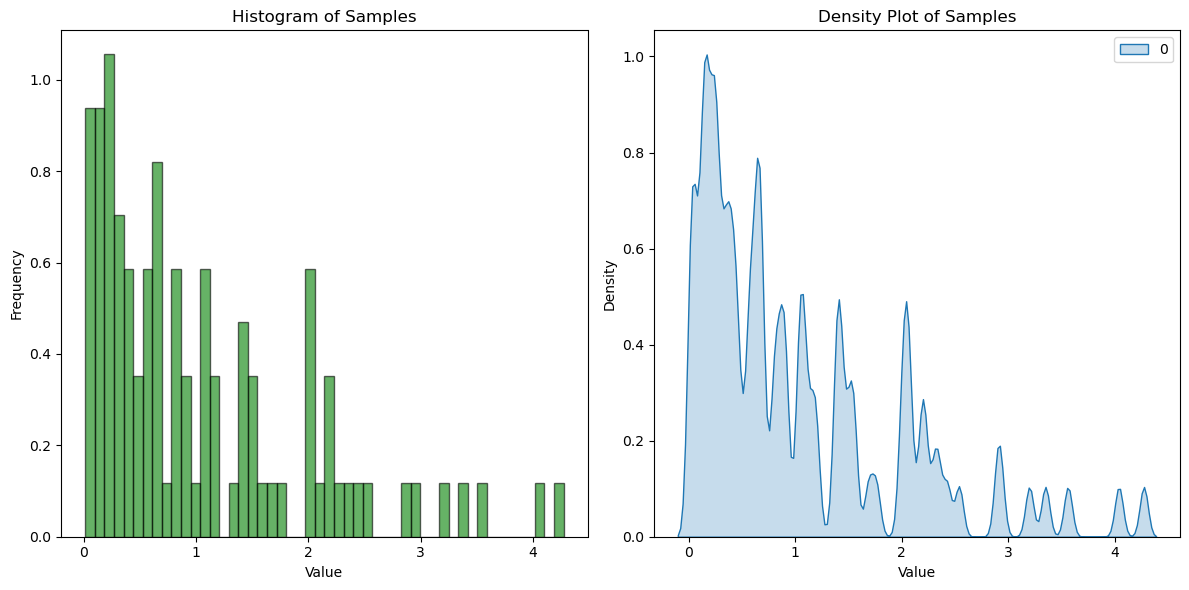

In [17]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(samples, shade=True, color='g', bw_adjust=0.1)
plt.title('Density Plot of Samples')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()
